# **Project:** Network Attack Detection

**Data set:** UNSW-NB15 Dataset

**Source of Data set:**  https://research.unsw.edu.au/projects/unsw-nb15-dataset

**Information about Data set**
> 1. Training set = 82,332 records 
2. Test set = 175,341 records
3. Features = 49 mentioned here. https://cloudstor.aarnet.edu.au/plus/apps/onlyoffice/s/2DhnLGDdEECo4ys?fileId=206777051

# What is Intrusion Detection System?

Intrusion Detection System (IDS) is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered.

**Detection Methods of IDS:**

**1. Signature-based Method:**

It detects the attacks on the basis of the

> 1.1. specific patterns such as number of bytes/ number of 1’s or number of 0’s in the network traffic. 

> 1.2. Known malicious instruction sequence that is used by the malware.

**2. Anomaly-detection Method:**

It detects the attacks using

> 2.1. Machine learning. It creates a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model 

**Which method is better?**

*Anomaly-detection Method* method is more accepted in comparison to signature-based IDS because the machine learning models can be trained according to the applications and hardware configurations.

















# Problem Statement

Network security is of prime importance these days. We need to protect our data and systems from attackers. A network attack attempts to gain unauthorized access to the network and take advantage of the vulnerablites of the network. 
In this project, we will predict the network attack that is happening over the network using the above mentioned dataset. 

The type of attacks investigated are: 
1. Fuzzers
2. Analysis
3. Backdoors
4. DoS
5. Exploits
6. Generic
7. Reconnaissance
8. Shellcode 
9. Worms 

In [11]:
import pandas as pd   #for dataframes
import numpy as np  #for array

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from  matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder  #for encoding of categorical columns

Reading the Dataset csv using the link of another git hub repo. 

In [12]:
from google.colab import files
uploaded = files.upload()

Saving UNSW_NB15_testing-set.csv to UNSW_NB15_testing-set (3).csv
Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set (1).csv


In [13]:
train = pd.read_csv('UNSW_NB15_training-set.csv')
test = pd.read_csv('UNSW_NB15_testing-set.csv')
combine = train.append(test)

In [14]:
combine.shape

(257673, 45)

#**Prepare the dataset**

---



# Dropping unnecessary columns

One such column is 'id', 'attack_cat'

In [15]:
combine = combine.drop(['id', 'attack_cat'],axis=1)
combine.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0


When we concatenate two DataFrames then we need to reset the index of the DataFrame. If the dataframe has a multiindex, this method can remove one or more levels. Otherwise if we don't do this, we get an error - "InvalidIndexError: Reindexing only valid with uniquely valued Index objects" 

In [16]:
combine = combine.reset_index(drop=True)

# Check for Missing Values

Since the dataset was clean, we donot have any missing values as seen below.

In [17]:
# checking for null values
combine.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int6

Getting name of all the columns of the dataset to see what should be the expected datatype of each column

In [18]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [19]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(combine[col].value_counts())
    print()

0    253995
1      3678
Name: is_sm_ips_ports, dtype: int64

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64



The col "is_ftp_login" has wrong values like 2 and 4. It should only have binary values like 0 and 1. If the ftp session is accessed by user using correct username and password then 1, otherwise 0. We need to fix this.

Therefore, we are replacing all the values other than 0 and 1 from these two columns.

In [20]:
combine['is_ftp_login'] = np.where(combine['is_ftp_login']>1, 1, combine['is_ftp_login'])

In [21]:
combine['is_ftp_login'].value_counts()

0    254428
1      3245
Name: is_ftp_login, dtype: int64

In [22]:
combine['service'].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In the feature "service" we see that we have "-". We need to replace that as well.

In [23]:
# removing all the "-" and replacing those with "None"
combine['service'] = combine['service'].apply(lambda x:"None" if x=="-" else x)

In [24]:
combine['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

#View the One hot encoding preprocessing file here

https://github.com/divyaKh/CMPE255Project/blob/main/1.Dataset/Dataset_and_its_Cleaning.ipynb

# Label encoding



In our dataset we have few categorical columns with text data. But when we apply ML models to our data, then we need every data to be numerical. 

So we have to convert categorical columns to numerical columns in some way. We will use label encoder where we will assign 1 if the value is present for the row and rest of the columns will be 0.

In [26]:
from sklearn.preprocessing import LabelEncoder

categorical = []
for col in combine.columns:
    if combine[col].dtype == 'object':
             categorical.append(col)

for col in categorical:
        le = LabelEncoder()
        le.fit(list(combine[col].astype(str).values) + list(combine[col].astype(str).values))
        combine[col] = le.transform(list(combine[col].astype(str).values))

combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,1


#More EDA can be seen here: https://github.com/divyaKh/CMPE255Project/blob/main/2.EDA/Exploratory_Data_Analysis.ipynb

#Plot lables

#Feature importances on combined dataset



Feature importance using Tree based classifier. 




#**CART classification**

In [27]:
from sklearn.tree import DecisionTreeClassifier

importance_dict = pd.DataFrame()

clf = DecisionTreeClassifier()
X=combine.drop(columns='label')
y=combine['label']
clf.fit(X, y)
feature_importance = clf.feature_importances_
importance_dict['combined'] =  feature_importance
importance_dict['combined']



0     0.007171
1     0.001695
2     0.002500
3     0.000700
4     0.005551
5     0.003124
6     0.037592
7     0.017116
8     0.006831
9     0.537763
10    0.000050
11    0.010245
12    0.008500
13    0.002633
14    0.000391
15    0.009656
16    0.006263
17    0.006779
18    0.006864
19    0.000000
20    0.009965
21    0.010757
22    0.000017
23    0.009196
24    0.066429
25    0.008523
26    0.066143
27    0.011790
28    0.000162
29    0.003007
30    0.018400
31    0.000246
32    0.005017
33    0.004128
34    0.003324
35    0.036776
36    0.000056
37    0.000124
38    0.005006
39    0.007132
40    0.062378
41    0.000000
Name: combined, dtype: float64

Feature: 0, Score: 0.00716
Feature: 1, Score: 0.00161
Feature: 2, Score: 0.00260
Feature: 3, Score: 0.00064
Feature: 4, Score: 0.00559
Feature: 5, Score: 0.00297
Feature: 6, Score: 0.03735
Feature: 7, Score: 0.01749
Feature: 8, Score: 0.00701
Feature: 9, Score: 0.53777
Feature: 10, Score: 0.00015
Feature: 11, Score: 0.01027
Feature: 12, Score: 0.00879
Feature: 13, Score: 0.00267
Feature: 14, Score: 0.00038
Feature: 15, Score: 0.00930
Feature: 16, Score: 0.00629
Feature: 17, Score: 0.00691
Feature: 18, Score: 0.00724
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01042
Feature: 21, Score: 0.01065
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00861
Feature: 24, Score: 0.06668
Feature: 25, Score: 0.00839
Feature: 26, Score: 0.06603
Feature: 27, Score: 0.01149
Feature: 28, Score: 0.00405
Feature: 29, Score: 0.00310
Feature: 30, Score: 0.01832
Feature: 31, Score: 0.00022
Feature: 32, Score: 0.00508
Feature: 33, Score: 0.00395
Feature: 34, Score: 0.00339
Feature: 35, Score: 0.03680
Fe

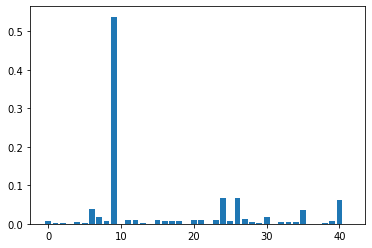

In [28]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [29]:
combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,1


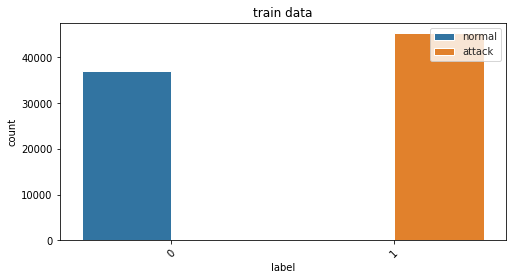

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

combine['label'].nunique()
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()
col_countplot('label')

**The label class is almost similar, then we dont need to do the sampling**

In [32]:
combine.shape

(257673, 43)

#Preprocessing : 

In [33]:
def removeHcorrFeature(percentage,X):
  # Selecting all the features with high correlation values with other features
  # Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
  corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
  o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
  print(o_drop)
  return o_drop

In [34]:
def applyPCA(X, n_com):
   #print(data_set)
   pca = PCA(n_components=n_com).fit(X)
   X_train_pca = pca.transform(X)
   print(pca.n_components_)
   return X_train_pca

**Appying PCA reduces the number of features to 29**

In [35]:
def applyMinMax(data):  
# scale features
  scaler = MinMaxScaler()
  model=scaler.fit(data)
  scaled_data=model.transform(data)
  return scaled_data
  #print(data_set)

In [36]:
def applyStandardScaler(data):
  scaler = StandardScaler()
  model = scaler.fit(data)
  scaled_data = model.transform(data)
  #print(data_set)
  return scaled_data

In [37]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

**Calling function and preparing the dataset**

In [38]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)
X = pd.DataFrame(X, columns =['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'])

X_mm.shape

Apply MinMax scaler


(257673, 42)

In [39]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)


Apply MinMax scaler


In [40]:
X_ss=combine.drop(columns='label')    
y_ss=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_ss = applyStandardScaler(X_ss)

Apply Standard scaler


**We wanted to capture 99% of the variance of the features and reduce the number of features as well**:

In [41]:
X_ss_corr=combine.drop(columns='label')    
y_ss_corr=combine['label']
n_com=0.99
cols = X_ss_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_ss_corr = applyStandardScaler(X_ss_corr)
X_ss_corr = pd.DataFrame(X_ss_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_ss_corr)
print(col)
X_ss_corr.drop(X_ss_corr[col], axis=1, inplace=True)
X_ss_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss']
['sloss', 'dloss']


(257673, 40)

Observations: 3 columns have been pruned due to high correlation with other features, other than target.

In [42]:
X_mm_corr=combine.drop(columns='label')    
y_mm_corr=combine['label']
n_com=0.99
cols = X_mm_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm_corr = applyMinMax(X_mm_corr)
X_mm_corr = pd.DataFrame(X_mm_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_mm_corr)
print(col)
X_mm_corr.drop(X_mm_corr[col], axis=1, inplace=True)
X_mm_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss']
['sloss', 'dloss']


(257673, 40)

In [43]:
from sklearn.decomposition import PCA
X_pca=combine.drop(columns='label')    
y_pca=combine['label']
n_com=0.99
cols = X_pca.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_pca = applyStandardScaler(X_pca)
X_pca = pd.DataFrame(X_pca, columns =cols)
X_pca = applyPCA(X_pca, n_com)
X_pca.shape

Apply MinMax scaler
29


(257673, 29)

OBSERVATION: After apply PCA the features got reduces to 29. That means that number of features that capures 99% variance has been reduced to 29 from 42.

**XGBoost**



In [44]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
# check accuracy score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import time

X= X
y= y
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27857
           1       0.95      0.94      0.95     49445

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25407  2450]
 [ 2750 46695]]
XGBoost model accuracy score: 0.9327
f1_score: 0.9472563140277919
Time taken to complete:
27.180254891999994


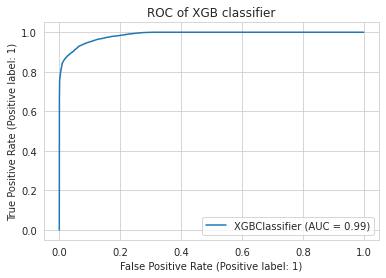

-----------------------------------------------------------------------------------------------------------------
X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27643
           1       0.95      0.95      0.95     49659

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25237  2406]
 [ 2701 46958]]
XGBoost model accuracy score: 0.9339
f1_score: 0.9484261232238975
Time taken to complete:
26.82437913800004


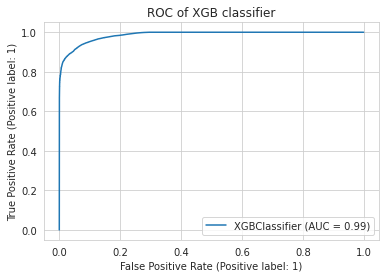

-----------------------------------------------------------------------------------------------------------------
X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27830
           1       0.95      0.94      0.95     49472

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25368  2462]
 [ 2768 46704]]
XGBoost model accuracy score: 0.9323
f1_score: 0.9469778381556804
Time taken to complete:
26.902486657999816


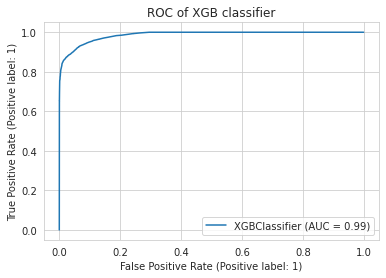

-----------------------------------------------------------------------------------------------------------------
X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27905
           1       0.95      0.95      0.95     49397

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25502  2403]
 [ 2660 46737]]
XGBoost model accuracy score: 0.9345
f1_score: 0.9486182855171154
Time taken to complete:
27.14134848699996


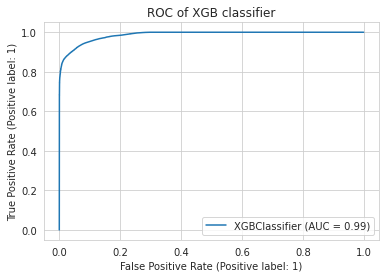

-----------------------------------------------------------------------------------------------------------------
X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27977
           1       0.95      0.94      0.95     49325

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25598  2379]
 [ 2790 46535]]
XGBoost model accuracy score: 0.9331
f1_score: 0.947383422062521
Time taken to complete:
26.980563151000297


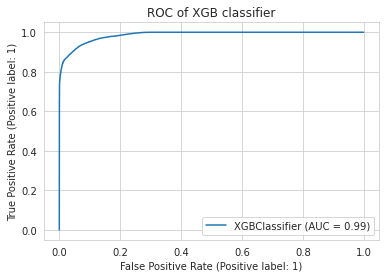

-----------------------------------------------------------------------------------------------------------------
X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27851
           1       0.95      0.95      0.95     49451

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25376  2475]
 [ 2646 46805]]
XGBoost model accuracy score: 0.9338
f1_score: 0.9481317924461415
Time taken to complete:
26.98309193299974


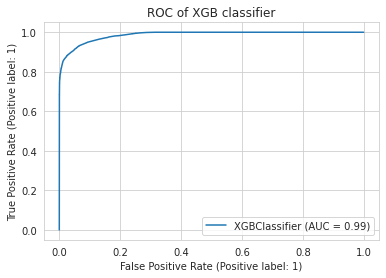

-----------------------------------------------------------------------------------------------------------------


In [68]:
acc_xgb=[]
f1_xgb=[]
dataset = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
for i in range(0,len(dataset)): 
  start = time.process_time()
  # your code here
  
  print("X=",dataset[i])
  print("y=",j[i])
  dataset[i]=combine.drop(columns='label')    
  j[i]=combine['label']
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = xgb.XGBClassifier()
  model.fit(X_train, y_train)
  predicted_xgb_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_xgb_y))
  print(metrics.confusion_matrix(y_test, predicted_xgb_y))
  acc_xgb.append(accuracy_score(y_test, predicted_xgb_y))
  print('XGBoost model accuracy score: {0:0.4f}'. format(acc_xgb[-1]))
  f1_xgb.append(f1_score(y_test, predicted_xgb_y))
  print("f1_score:",f1_xgb[-1])
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

In [70]:
import matplotlib.pyplot as plt
def displayAnalysisGraphs(acc,f1):
  plt.plot(list1,acc)
  plt.ylabel("Accuracy")
  plt.title("Accuracy for dataset after different preprocessing techniques")
  plt.show()

  plt.plot(list1,f1)
  plt.ylabel("F1 score")
  plt.title("F1 scores for dataset after different preprocessing techniques")
  plt.show()

FOR XGBOOST


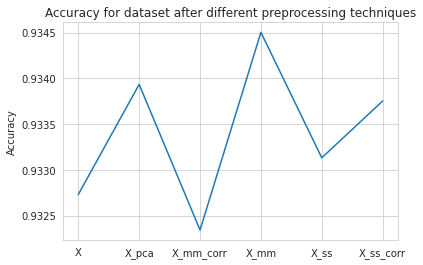

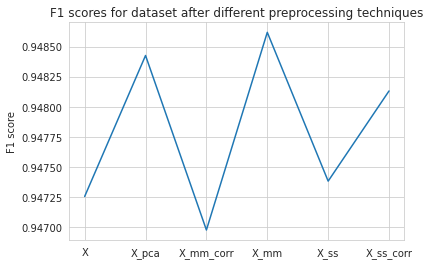

In [71]:
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
print("FOR XGBOOST")
displayAnalysisGraphs(acc_xgb,f1_xgb)

**OBSERVATION: The best accuracy for XGBoost is for Standard scaling and correlation analysis. The F1 score is also good for the same**

**GB Gradient**

X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.000009    119        2  ...          30          30                0

[257673 rows x 42 columns]
y= 0         0
1     

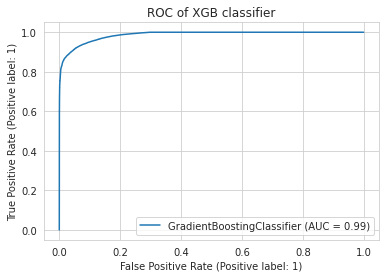

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

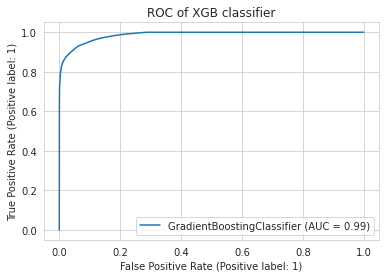

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

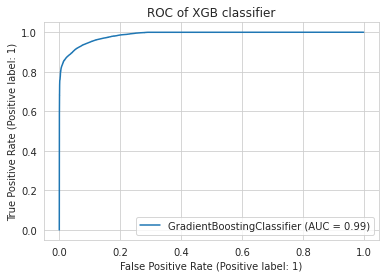

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

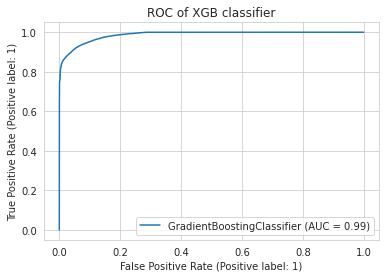

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

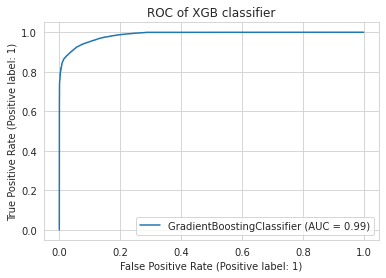

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

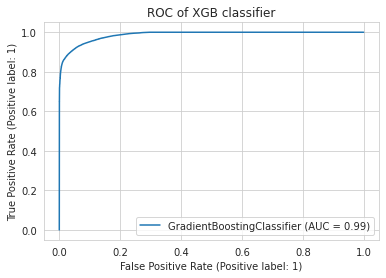

-----------------------------------------------------------------------------------------------------------------


In [60]:
acc_gb=[]
f1_gb=[]
dataset = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
for i in range(0,len(dataset)): 
  start = time.process_time()
  dataset[i]=combine.drop(columns='label')    
  j[i]=combine['label']
  print("X=",dataset[i])
  print("y=",j[i])
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = GradientBoostingClassifier()
  model.fit(X_train, y_train)
  predicted_gb_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_gb_y))
  print(metrics.confusion_matrix(y_test, predicted_gb_y))
  acc_gb.append(accuracy_score(y_test, predicted_gb_y))
  print('Gradient model accuracy score: {0:0.4f}'. format(acc_gb[-1]))
  f1_gb.append(f1_score(y_test, predicted_gb_y))
  print("f1_score:",f1_gb[-1])
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

FOR GB Gradient


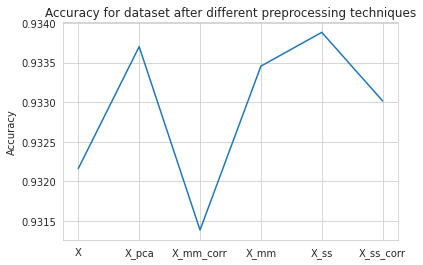

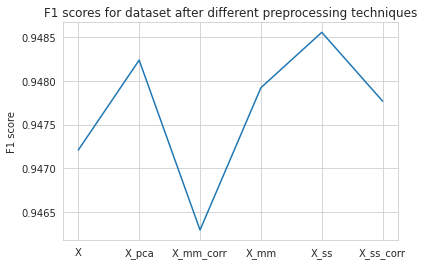

In [61]:
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
print("FOR GB Gradient")
displayAnalysisGraphs(acc_gb,f1_gb)

**Decision trees**

X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.000009    119        2  ...          30          30                0

[257673 rows x 42 columns]
y= 0         0
1     

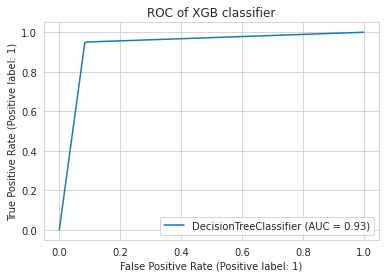

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

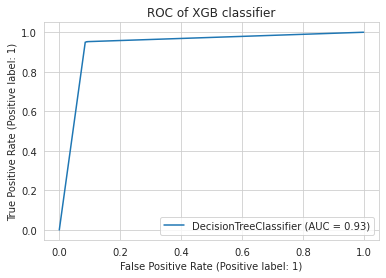

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

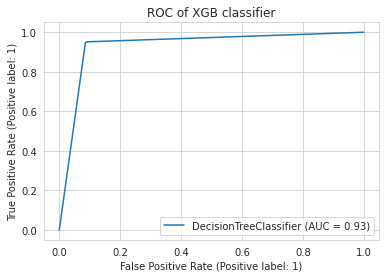

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

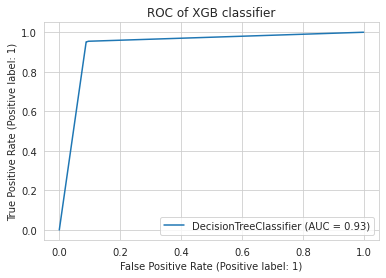

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

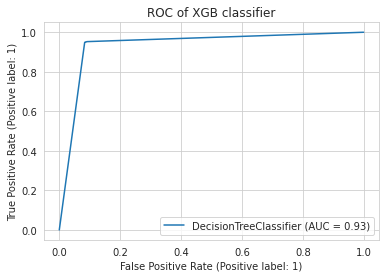

-----------------------------------------------------------------------------------------------------------------
X=              dur  proto  service  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0       0.000011    119        0  ...           1           2                0
1       0.000008    119        0  ...           1           2                0
2       0.000005    119        0  ...           1           3                0
3       0.000006    119        0  ...           2           3                0
4       0.000010    119        0  ...           2           3                0
...          ...    ...      ...  ...         ...         ...              ...
257668  0.000009    119        2  ...          24          24                0
257669  0.505762    113        0  ...           1           1                0
257670  0.000009    119        2  ...           3          12                0
257671  0.000009    119        2  ...          30          30                0
257672  0.0000

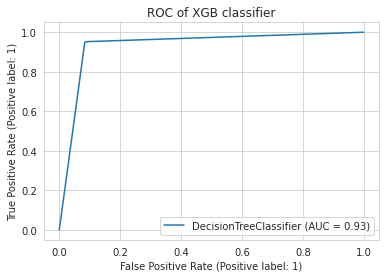

-----------------------------------------------------------------------------------------------------------------


In [62]:
acc_dt=[]
f1_dt=[]
dataset = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
for i in range(0,len(dataset)): 
  dataset[i]=combine.drop(columns='label')    
  j[i]=combine['label']
  print("X=",dataset[i])
  print("y=",j[i])
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  predicted_dt_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_dt_y))
  print(metrics.confusion_matrix(y_test, predicted_dt_y))
  acc_dt.append(accuracy_score(y_test, predicted_dt_y))
  print('Decision trees model accuracy score: {0:0.4f}'. format(acc_dt[-1]))
  f1_dt.append(f1_score(y_test, predicted_dt_y))
  print("f1_score:",f1_dt)
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

FOR Decison Tree


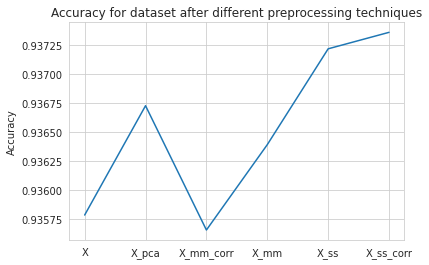

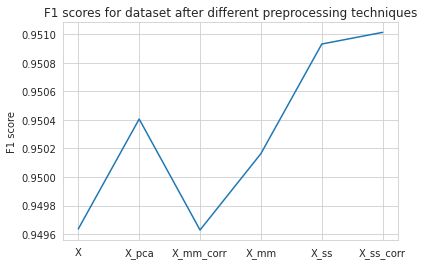

In [63]:
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
print("FOR Decison Tree")
displayAnalysisGraphs(acc_dt,f1_dt)

**Random forest**

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27890
           1       0.96      0.96      0.96     49412

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9819 18071]
 [17589 31823]]
Random Forest model accuracy score: 0.9506
f1_score: 0.9612665699767742
Time taken to complete:
140.74811673


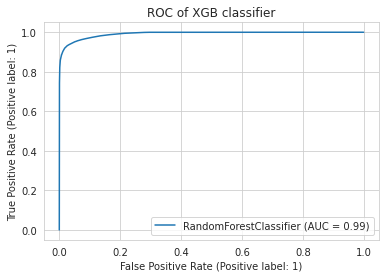

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27865
           1       0.96      0.96      0.96     49437

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9968 17897]
 [17440 31997]]
Random Forest model accuracy score: 0.9499
f1_score: 0.9607553133294163
Time taken to complete:
176.18356006699992


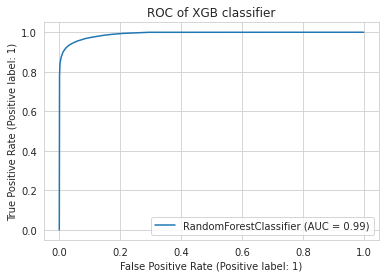

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27814
           1       0.96      0.96      0.96     49488

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9984 17830]
 [17424 32064]]
Random Forest model accuracy score: 0.9496
f1_score: 0.9605341817555451
Time taken to complete:
211.86221853999996


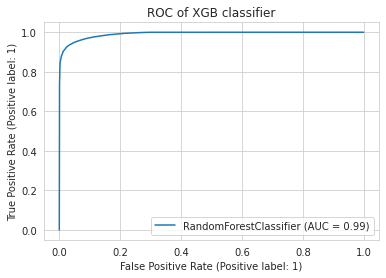

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27981
           1       0.96      0.96      0.96     49321

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9842 18139]
 [17566 31755]]
Random Forest model accuracy score: 0.9507
f1_score: 0.9613521674806964
Time taken to complete:
247.90849995899998


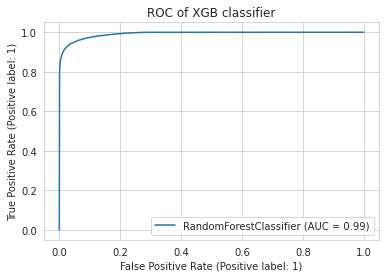

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27952
           1       0.96      0.96      0.96     49350

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.94     77302
weighted avg       0.95      0.95      0.95     77302

[[ 9889 18063]
 [17519 31831]]
Random Forest model accuracy score: 0.9489
f1_score: 0.9598455598455599
Time taken to complete:
283.308869339


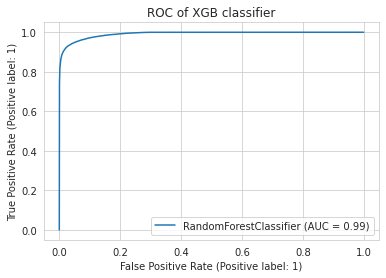

-----------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     28010
           1       0.96      0.96      0.96     49292

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[10162 17848]
 [17246 32046]]
Random Forest model accuracy score: 0.9503
f1_score: 0.9609637673062662
Time taken to complete:
318.41630990600015


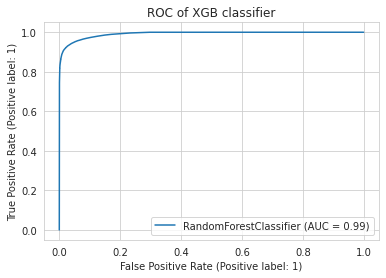

-----------------------------------------------------------------------------------------------------------------


In [64]:
acc_rf=[]
f1_rf=[]
dataset = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
j=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
for i in range(0,len(dataset)): 
  dataset[i]=combine.drop(columns='label')    
  j[i]=combine['label']
  X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  predicted_rt_y = model.predict(X_test)
  print(metrics.classification_report(y_test, predicted_rt_y))
  print(metrics.confusion_matrix(y_test, predicted_gb_y))
  acc_rf.append(accuracy_score(y_test, predicted_rt_y))
  print('Random Forest model accuracy score: {0:0.4f}'. format(acc_rf[-1]))
  f1_rf.append(f1_score(y_test,predicted_rt_y))
  print("f1_score:",f1_rf[-1])
  print("Time taken to complete:")
  print(time.process_time() - start)
  #plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test)
  plt.title("ROC of XGB classifier")
  plt.show()
  print("-----------------------------------------------------------------------------------------------------------------")

FOR RNADOM FOREST


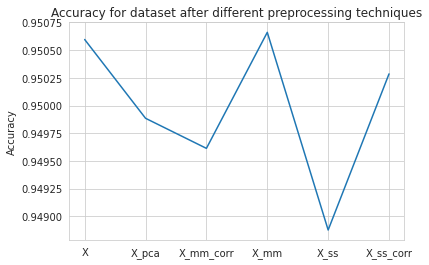

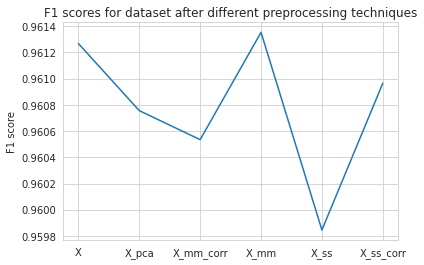

In [65]:
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
print("FOR RNADOM FOREST")
displayAnalysisGraphs(acc_rf,f1_rf)

##Visualize performance of different ML models for different Pre-Processing techniques

In [83]:
def displayComparisonGraphsOfModels(index):
  acc = [acc_rf[index], acc_gb[index], acc_dt[index], acc_xgb[index]]
  plt.plot(["XGB","GB","DT","RT"],acc)
  plt.title("Accuracy comparison between different ML models")
  plt.ylabel("Accuracy")
  plt.xlabel("ML Model")
  plt.show()


**WITHOUT ANY PREPROCESSING**

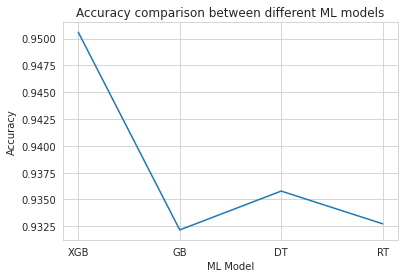

In [84]:
displayComparisonGraphsOfModels(0)

**WITH PCA AND STANDARD SCALER**

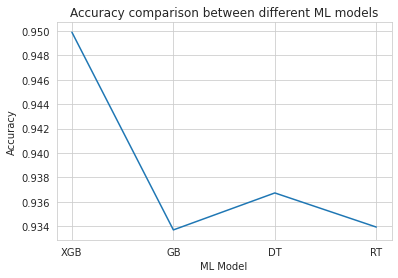

In [86]:
displayComparisonGraphsOfModels(1)

**WITH REMOVING CORRELATION (AMONG FEATURES) AND MINMAX SCALING**

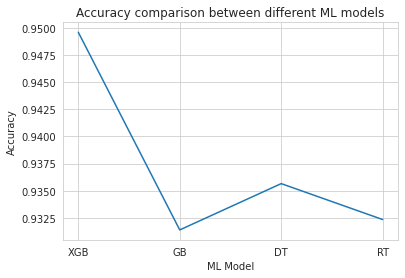

In [87]:
displayComparisonGraphsOfModels(2)


**WITH MINMAX SCALING**



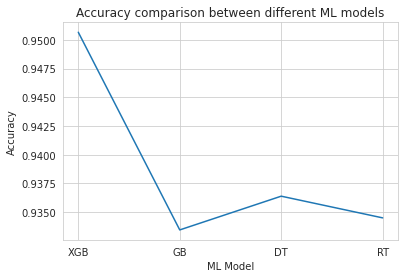

In [88]:
displayComparisonGraphsOfModels(3)

**WITH STANDARD SCALING**


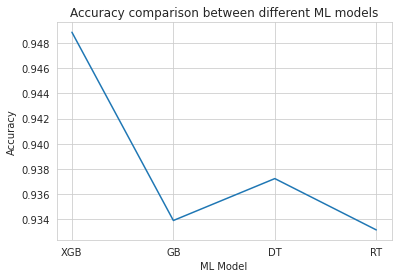

In [89]:
displayComparisonGraphsOfModels(4)

**WITH STANDARD SCALING AND CORRELATION**

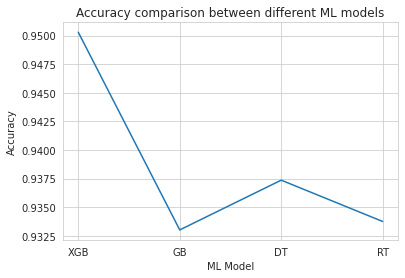

In [90]:
displayComparisonGraphsOfModels(5)